You are exploring the wilderness of _Mushroomia_, a land populated by a plethora of diverse fauna and flora. In particular, _Mushroomia_ is known for its unparalleled variety in mushrooms. However, not all the mushrooms in _Mushroomia_ are edible. As you make your way through _Mushroomia_, you would like to know which mushrooms are edible, in order to forage for supplies for your daily mushroom soup.

You have access to:
* _Shroomster Pro Max <sup>TM</sup>_ - a state of the art data collection device, developed by _Mushroomia_, that allows you to collect various data points about any mushroom you encounter in the wild
* _The National Archives on Mushrooms_ - a dataset collected over the years by the government of _Mushroomia_

To address this problem, you decide to use the skills you learnt in CSM148 and train machine learning models on the _The National Archives on Mushrooms_ in order to use your _Shroomster Pro Max <sup>TM</sup>_ to determine whether the mushrooms you encounter on your adventure can be added to your daily mushroom soup.  

This project will be more unstructured than the previous two projects in order to allow you to experience how data science problems are solved in practice. There are two parts to this project: a Jupyter Notebook with your code (where you explore, visualize, process your data and train machine learning models) and a report (where you explain the various choices you make in your implementation and analyze the final performance of your models).

# 1. Loading and Viewing Data



In [1]:
import pandas as pd
# pd.read_csv(...)
# note delimitter for this file is semi-colon (;) not comma

mushroom_train = pd.read_csv("mushroom_train.csv", sep = ";")
mushroom_test = pd.read_csv("mushroom_test.csv", sep = ";")

mushroom_train.head()
mushroom_test.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,2.50,b,NaN,k,f,a,NaN,k,8.42,...,NaN,NaN,g,NaN,w,f,f,k,g,u
1,p,3.07,b,NaN,k,f,a,NaN,n,7.24,...,NaN,NaN,n,NaN,w,f,f,k,g,a
2,p,3.30,b,NaN,n,f,a,NaN,n,10.22,...,NaN,NaN,n,NaN,w,f,f,k,g,u
3,p,3.49,b,NaN,k,f,a,NaN,k,11.00,...,NaN,NaN,n,NaN,w,f,f,k,g,a
4,p,2.79,b,NaN,n,f,a,NaN,n,6.97,...,NaN,NaN,g,NaN,w,f,f,k,g,u


# 2. Splitting Data into Features and Labels

In [2]:
# Only keep features that shroomster can detect!
train_data = mushroom_train.drop("class", axis = 1)
train_labels = mushroom_train["class"].copy()

test_data = mushroom_test.drop("class", axis = 1)
test_labels = mushroom_test["class"].copy()

In [3]:
print (train_data.shape, train_labels.shape)
print (test_data.shape, test_labels.shape)

(50213, 20) (50213,)
(10856, 20) (10856,)


# 3. Data Exploration and Visualization

<AxesSubplot:xlabel='season', ylabel='count'>

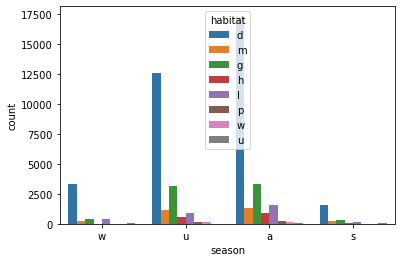

In [4]:
# Hint: We have done this in both project 1 & 2

%matplotlib inline
import matplotlib.pyplot as plt #plotting package
import seaborn as sns

# plot of seasons grouped by habitat
sns.countplot(data = train_data, x = "season", hue = "habitat")

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

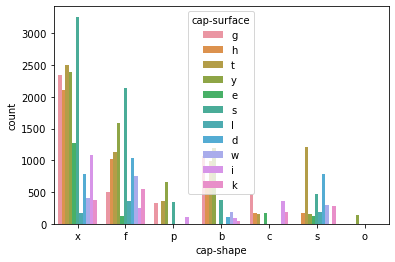

In [5]:
# distribution of cap shape grouped by cap surface
sns.countplot(data = train_data, x = "cap-shape", hue = "cap-surface")

<AxesSubplot:xlabel='veil-color', ylabel='count'>

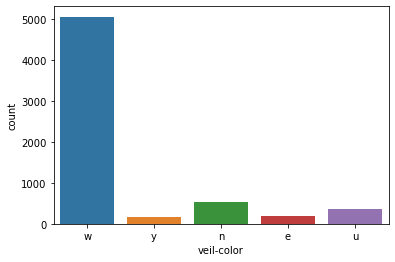

In [6]:
# distribution of veils
sns.countplot(data = train_data, x = "veil-color")

<AxesSubplot:xlabel='stem-surface', ylabel='count'>

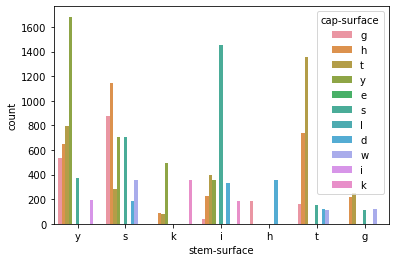

In [7]:
# stem-surface by cap-surface
sns.countplot(data = train_data, x = "stem-surface", hue = "cap-surface")

<AxesSubplot:xlabel='ring-type', ylabel='count'>

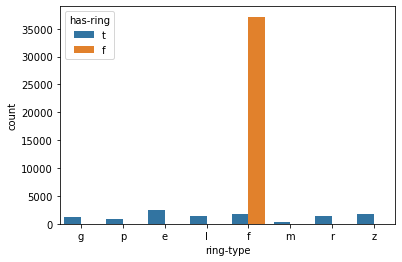

In [8]:
# distribution of veils
sns.countplot(data = train_data, x = "ring-type", hue = "has-ring")

<AxesSubplot:>

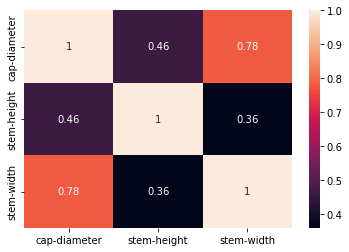

In [9]:
# correlation matrix
sns.heatmap(train_data.corr(), annot = True, annot_kws = {"size":10})

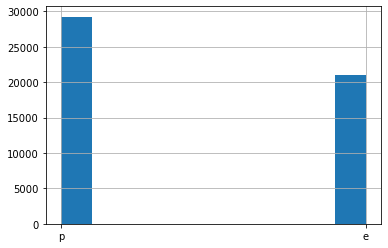

p    29242
e    20971
Name: class, dtype: int64

In [10]:
# check if label classes are balanced
train_labels.hist()
plt.show()
train_labels.value_counts()

In [11]:
# check null values
train_data.isnull().sum()

cap-diameter                0
cap-shape                   0
cap-surface             12298
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          7766
gill-spacing            19149
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               42800
stem-surface            30301
stem-color                  0
veil-type               47036
veil-color              43916
has-ring                    0
ring-type                1765
spore-print-color       45681
habitat                     0
season                      0
dtype: int64

# 4. Data Processing

In [12]:
# Hints:
# 1. Convert the "class" column into labels: 'p' (poisonous) -> 0,  'e' (edible) -> 1 
# 2. You can drop columns if you see fit
# 3. See any imcomplete data? We learned how to deal with them in project 1.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

# convert 'class' into labels
new_y_train = pd.DataFrame(train_labels)
new_y_train['class'] = new_y_train['class'].apply(lambda x: ['p', 'e'].index(x))
new_y_train = new_y_train['class']

new_y_test = pd.DataFrame(test_labels)
new_y_test['class'] = new_y_test['class'].apply(lambda x: ['p', 'e'].index(x))
new_y_test = new_y_test['class']

In [13]:
# drop features with high percentage of NA's
train_data = train_data.drop(['stem-root', 'veil-type', 'veil-color', 'spore-print-color', 'stem-surface'], axis = 1)
test_data = test_data.drop(['stem-root', 'veil-type', 'veil-color', 'spore-print-color', 'stem-surface'], axis = 1)

In [14]:
# for categorical features, replace na values with mode values

## train data
mode_cap_surface = train_data["cap-surface"].mode().iloc[0]
mode_gill_attachment = train_data["gill-attachment"].mode().iloc[0]
mode_gill_spacing = train_data["gill-spacing"].mode().iloc[0]
mode_ring_type = train_data["ring-type"].mode().iloc[0]

train_data["cap-surface"].fillna(mode_cap_surface, inplace=True)
train_data["gill-attachment"].fillna(mode_gill_attachment, inplace=True)
train_data["gill-spacing"].fillna(mode_gill_spacing, inplace=True)
train_data["ring-type"].fillna(mode_ring_type, inplace=True)

## test data
mode_cap_surface = test_data["cap-surface"].mode().iloc[0]
mode_gill_attachment = test_data["gill-attachment"].mode().iloc[0]
mode_gill_spacing = test_data["gill-spacing"].mode().iloc[0]
mode_ring_type = test_data["ring-type"].mode().iloc[0]

test_data["cap-surface"].fillna(mode_cap_surface, inplace=True)
test_data["gill-attachment"].fillna(mode_gill_attachment, inplace=True)
test_data["gill-spacing"].fillna(mode_gill_spacing, inplace=True)
test_data["ring-type"].fillna(mode_ring_type, inplace=True)

# 5. Data Augmentation (Creating at least 2 New Features)

In [15]:
# Similar to Project 1 and 2. 

import numpy as np

train_data["stem-volume"] = (((train_data["stem-width"]*0.1)/2)*np.pi)*train_data["stem-height"]
train_data["cap-area"] = np.pi*(train_data["cap-diameter"]/2)**2

test_data["stem-volume"] = (((test_data["stem-width"]*0.1)/2)*np.pi)*test_data["stem-height"]
test_data["cap-area"] = np.pi*(test_data["cap-diameter"]/2)**2

In [16]:
# Pipeline

# remove categorical features from the numeric values
train_data_num = train_data.drop(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
                                  'gill-attachment', 'gill-spacing', 'gill-color', 
                                  'stem-color', 'has-ring', 'ring-type', 'habitat', 'season'], axis = 1)

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
    ])

numerical_features = list(train_data_num)
categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
                        'gill-attachment', 'gill-spacing', 'gill-color', 
                        'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical_features),
    ])

prepared_train = full_pipeline.fit_transform(train_data).toarray()
prepared_test = full_pipeline.transform(test_data).toarray()

# 6.  Logistic Regression & Statistical Hypothesis Testing

In [17]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(prepared_train, new_y_train)

LogisticRegression(solver='liblinear')

In [18]:
#Generate predictions and score them!
predicted = log_reg.predict(prepared_test)
score = log_reg.predict_proba(prepared_test)[:,1]

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))

Accuracy:    0.482775


In [19]:
import statsmodels.api as sm

# subset containing only numerical features
prepared_train_subset = pd.DataFrame(prepared_train).iloc[:, 0:5]
prepared_train_subset = prepared_train_subset.to_numpy()

sm_x = sm.add_constant(prepared_train_subset)
model = sm.GLM(new_y_train, sm_x, family=sm.families.Binomial())

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  class   No. Observations:                50213
Model:                            GLM   Df Residuals:                    50207
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33331.
Date:                Fri, 03 Mar 2023   Deviance:                       66661.
Time:                        16:39:43   Pearson chi2:                 5.02e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3396      0.009    -36.893      0.0

# 7. Dimensionality Reduction using PCA



In [20]:
# PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn import decomposition

pca = decomposition.PCA(n_components=0.95)

# Now we run the fit operation to convert our 
# data to a PCA transformmed data
pca_train = pca.fit_transform(prepared_train)

In [21]:
# Logistic Regression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(pca_train, new_y_train)

# PCA our Test data
pca_test = pca.transform(prepared_test)
predicted = log_reg.predict(pca_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted)))

Accuracy:    0.470155
Precision:   0.792092
Recall:      0.100000
F1 Score:    0.177581


# 8. Experiment with any 2 other models (Non-Ensemble)

In [22]:
# print results function

def print_results(model):
    predicted = model.predict(prepared_test)

    print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))
    print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted)))
    print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted)))
    print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted)))

In [23]:
# Models: https://scikit-learn.org/stable/supervised_learning.html

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(prepared_train, new_y_train)

print_results(knn)

Accuracy:    0.538596
Precision:   0.702666
Recall:      0.335266
F1 Score:    0.453941


In [24]:
# Decision Trees
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(random_state = 1)
decision_tree.fit(prepared_train, new_y_train)

print_results(decision_tree)

Accuracy:    0.541912
Precision:   0.675660
Recall:      0.383092
F1 Score:    0.488953


# 9. Experiment with 1 Ensemble Method

In [25]:
# Ensemble Methods: https://scikit-learn.org/stable/modules/ensemble.html

# Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 1)
forest.fit(prepared_train, new_y_train)

print_results(forest)

Accuracy:    0.591470
Precision:   0.943085
Recall:      0.304187
F1 Score:    0.460002


# 10. Cross-Validation & Hyperparameter Tuning for All 3 Models

In [26]:
# Cross-Validation: https://scikit-learn.org/stable/modules/cross_validation.html
# Hyperparameter Tuning: https://scikit-learn.org/stable/modules/grid_search.html

from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [27]:
# KNN
from sklearn.model_selection import cross_val_score

params = {'n_neighbors': [5, 10, 20, 30, 50]}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid = params, cv=5, scoring='accuracy')
grid_search.fit(prepared_train, new_y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'n_neighbors': 50}
Best score:  0.46822795220940316


In [28]:
# Decision Tree

param_dict = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
decision_tree = tree.DecisionTreeClassifier(random_state = 1)


grid = GridSearchCV(decision_tree,
                   param_grid=param_dict,
                   cv=5
                   )
grid.fit(prepared_train, new_y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.5936522207643956


In [31]:
# Random Forest

grid = {
    'n_estimators': [100, 200, 300]
}
forest = RandomForestClassifier(random_state = 1)

forest_cv = GridSearchCV(estimator = forest, param_grid = grid, cv = 3)
forest_cv.fit(prepared_train, new_y_train)

print("Best hyperparameters: ", forest_cv.best_params_)
print("Best score: ", forest_cv.best_score_)

Best hyperparameters:  {'n_estimators': 200}
Best score:  0.5406759208009806


# 11. Report Final Results 

In [33]:
# KNN

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(prepared_train, new_y_train)

print_results(knn)

Accuracy:    0.551400
Precision:   0.723930
Recall:      0.348792
F1 Score:    0.470767


In [34]:
# Decision Tree

decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, 
                                            max_features = 'log2', min_samples_leaf = 1, 
                                            min_samples_split = 2, random_state = 1)
decision_tree.fit(prepared_train, new_y_train)

print_results(decision_tree)

Accuracy:    0.558032
Precision:   1.000000
Recall:      0.227375
F1 Score:    0.370506


In [35]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 200, random_state = 1)
forest.fit(prepared_train, new_y_train)

print_results(forest)

Accuracy:    0.590457
Precision:   0.929825
Recall:      0.307246
F1 Score:    0.461874
